# Домашняя работа 2

### Выполнил Сергей Стерхов

#### Задача 1

Подключаем нужные библиотеки

In [1]:
import numpy as np
import itertools

Функция, которая на входе принимает матрицу и возвращает все подмножества по строчкам матрицы

In [2]:
def find_subsets(a):
    obj_subsets = []
    for i in range(0, a.shape[0] + 1):
        cur_subsets = itertools.combinations(np.arange(a.shape[0]), i)
        obj_subsets.extend(cur_subsets)
    return obj_subsets

Функция, которая на входе принимает матрицу и массив номеров строк, и для этих строк находит номера общих столбцов. Их и возвращает.

In [3]:
def find_obraz(m, subset):
    if not len(subset):
        return np.arange(m.shape[1])
    subset_values = np.array(m[subset, :])
    pre_obraz = np.apply_along_axis(min, 0, subset_values)
    return np.arange(m.shape[1])[np.where(pre_obraz == 1)]

Функция, принимающая на входе матрицу и массив всех возможных подмножеств номеров строк матрицы. Возвращает все понятия

In [4]:
def find_concepts(a, subsets):
    res = []
    for subset in subsets:
        f_subset = find_obraz(a, subset)
        f_f_subset = find_obraz(a.T, f_subset)
        if np.array_equal(subset, f_f_subset):
            res.append((list(subset), list(f_subset)))
    return res

Функция, которая выводит результат. На вход принимает понятия, и была ли изначально транспонирована матрица для более оптимального перебора. Выводит понятия в формате
[множество объектов] [множество признаков]
Ничего не возвращает.

In [5]:
def print_result(res, transpose):
    print("Concepts ([objects] [properties]):")
    for concept in res:
        if transpose:
            print(concept[1], concept[0])
        else:
            print(concept[0], concept[1])
    print("Total number:", len(res))

Функция, принимающая на вход матрицу контекста из нулей и единичек. Внутри функция смотрит, по чему оптимальнее перебирать (по объектам или признакам), находит все подмножества для перебираемого, находит понятия, выводит их на экран

In [6]:
def concept_search(a):
    if a.shape[0] > a.shape[1]:
        a = a.T
        transpose = True
    else:
        transpose = False
    subsets = find_subsets(a)
    res = find_concepts(a, subsets)
    print_result(res, transpose)
    return len(res)

Задается матрица контекста:

In [7]:
a = np.matrix([[1, 1, 1, 1, 1, 0, 1, 1, 1],
               [0, 1, 0, 1, 0, 0, 0, 0, 1],
               [0, 1, 0, 1, 0, 0, 0, 0, 1],
               [0, 0, 0, 1, 0, 0, 0, 0, 0],
               [0, 1, 1, 1, 1, 1, 0, 0, 1],
               [0, 1, 0, 0, 0, 0, 0, 0, 0],
               [1, 1, 1, 1, 1, 1, 1, 0, 1],
               [1, 0, 1, 0, 0, 0, 1, 1, 1],
               [1, 1, 0, 1, 0, 1, 0, 0, 1],
               [0, 1, 1, 1, 1, 1, 0, 0, 1],
               [1, 1, 0, 1, 0, 0, 0, 1, 1],
               [1, 1, 1, 1, 0, 0, 1, 1, 1],
               [1, 1, 0, 1, 0, 1, 1, 0, 1]])

Запускаем функцию:

In [8]:
res = concept_search(a)

Concepts ([objects] [properties]):
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] []
[0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 12] [1]
[0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 12] [3]
[0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 12] [8]
[0, 6, 7, 8, 10, 11, 12] [0, 8]
[0, 4, 6, 7, 9, 11] [2, 8]
[0, 6, 7, 11, 12] [0, 6, 8]
[0, 7, 10, 11] [0, 7, 8]
[0, 1, 2, 4, 6, 8, 9, 10, 11, 12] [1, 3, 8]
[0, 6, 8, 10, 11, 12] [0, 1, 3, 8]
[0, 6, 7, 11] [0, 2, 6, 8]
[0, 4, 6, 9, 11] [1, 2, 3, 8]
[4, 6, 8, 9, 12] [1, 3, 5, 8]
[6, 8, 12] [0, 1, 3, 5, 8]
[0, 6, 11, 12] [0, 1, 3, 6, 8]
[0, 10, 11] [0, 1, 3, 7, 8]
[0, 7, 11] [0, 2, 6, 7, 8]
[0, 4, 6, 9] [1, 2, 3, 4, 8]
[0, 6, 11] [0, 1, 2, 3, 6, 8]
[6, 12] [0, 1, 3, 5, 6, 8]
[4, 6, 9] [1, 2, 3, 4, 5, 8]
[0, 6] [0, 1, 2, 3, 4, 6, 8]
[0, 11] [0, 1, 2, 3, 6, 7, 8]
[6] [0, 1, 2, 3, 4, 5, 6, 8]
[0] [0, 1, 2, 3, 4, 6, 7, 8]
[] [0, 1, 2, 3, 4, 5, 6, 7, 8]
Total number: 26


Вуаля! Итого 26 понятий.

#### Задача 2

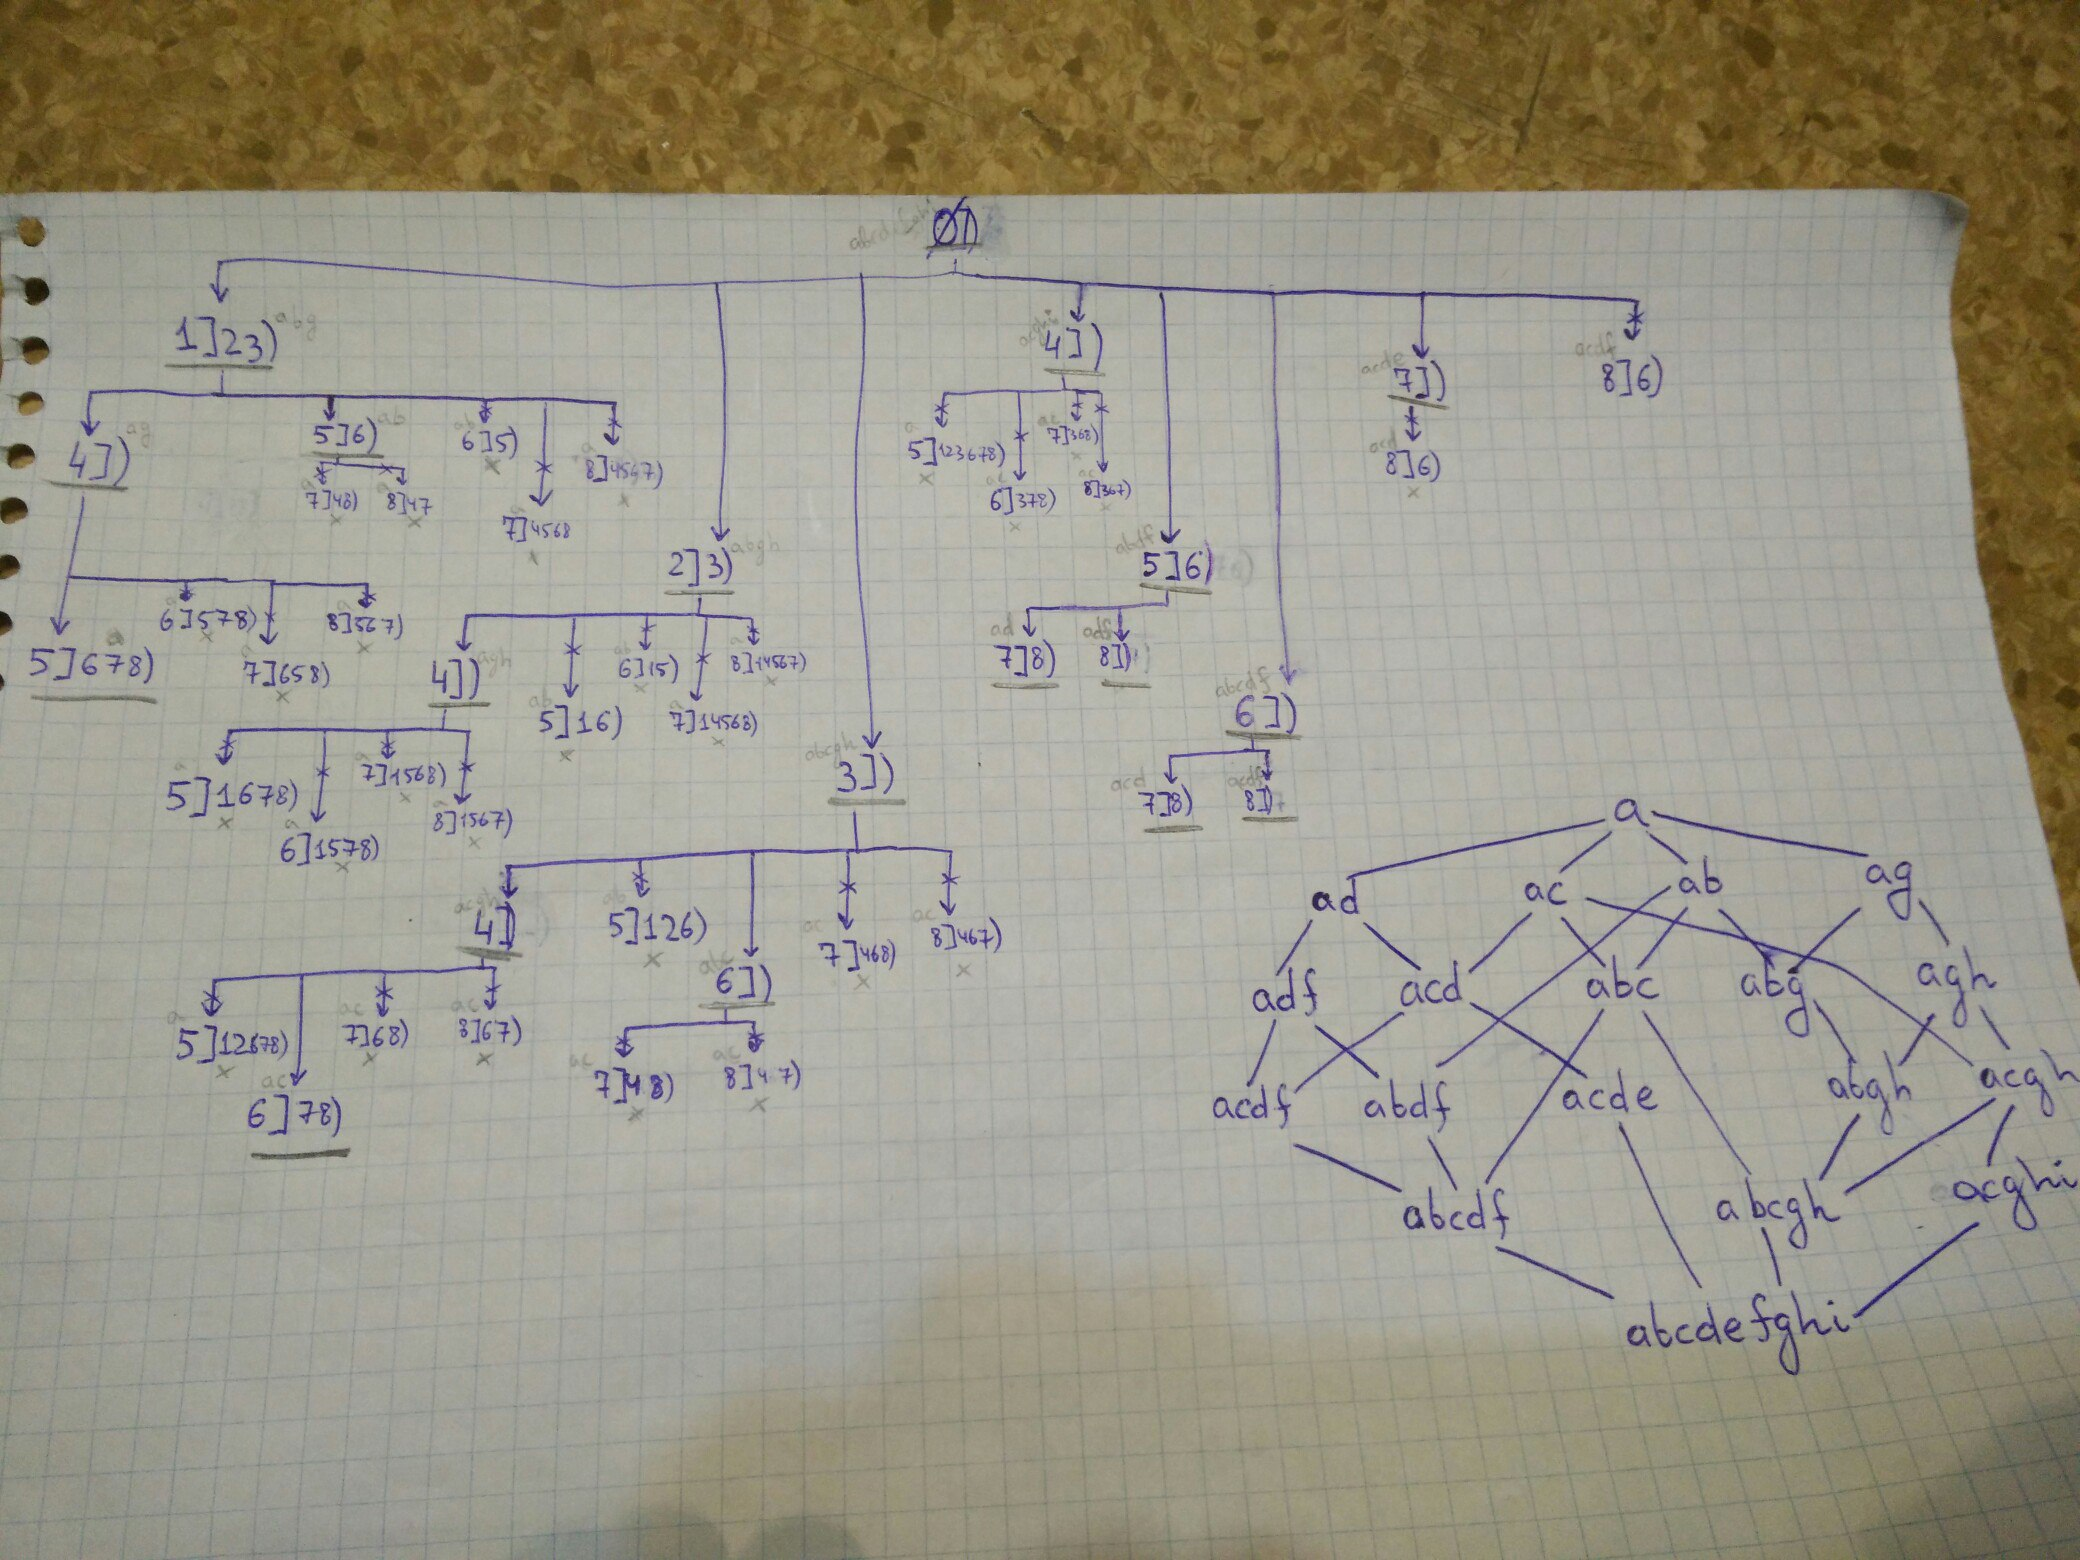

In [9]:
from IPython.display import Image
Image(filename='E:/Study/The_best_course_ever_absolutely_awesome/HW2/HW2_2.jpg') 

Ради интереса проверим результат в 19 понятий на написанном коде

In [10]:
a2 = np.matrix([[1,1,0,0,0,0,1,0,0],
               [1,1,0,0,0,0,1,1,0],
               [1,1,1,0,0,0,1,1,0],
               [1,0,1,0,0,0,1,1,1],
               [1,1,0,1,0,1,0,0,0],
               [1,1,1,1,0,1,0,0,0],
               [1,0,1,1,1,0,0,0,0],
               [1,0,1,1,0,1,0,0,0]])

In [11]:
ans = concept_search(a2)

Concepts ([objects] [properties]):
[] [0, 1, 2, 3, 4, 5, 6, 7, 8]
[2] [0, 1, 2, 6, 7]
[3] [0, 2, 6, 7, 8]
[5] [0, 1, 2, 3, 5]
[6] [0, 2, 3, 4]
[1, 2] [0, 1, 6, 7]
[2, 3] [0, 2, 6, 7]
[2, 5] [0, 1, 2]
[4, 5] [0, 1, 3, 5]
[5, 7] [0, 2, 3, 5]
[0, 1, 2] [0, 1, 6]
[1, 2, 3] [0, 6, 7]
[4, 5, 7] [0, 3, 5]
[5, 6, 7] [0, 2, 3]
[0, 1, 2, 3] [0, 6]
[4, 5, 6, 7] [0, 3]
[0, 1, 2, 4, 5] [0, 1]
[2, 3, 5, 6, 7] [0, 2]
[0, 1, 2, 3, 4, 5, 6, 7] [0]
Total number: 19


Ура, сошлось!